# **Example Usage of `neuralnet.py`**

### **Multi-Class Classification**

In [1]:
from zipfile import ZipFile as zip

with zip("data.zip") as f:
    f.extractall()
    f.close()

In [2]:
from neuralnet import NeuralNetwork
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("multiclass_train.csv")
train, test = train_test_split(data, test_size = 0.3)
train_data = train.loc[:, train.columns != "label"].to_numpy() / 255
train_target = train["label"].to_numpy()
test_data = test.loc[:, test.columns != "label"].to_numpy() / 255
test_target = test["label"].to_numpy()

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17929,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2630,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31584,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32370,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17461,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5079,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29413,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
one_hot = OneHotEncoder(sparse = False, categories = "auto")
train_target = one_hot.fit_transform(train_target.reshape(-1, 1))
test_target = one_hot.transform(test_target.reshape(-1, 1))

In [6]:
NN = NeuralNetwork(input_size = train_data.shape[1])
NN.add_layer(32, "relu")
NN.add_layer(16, "relu")
NN.add_layer(10, "softmax")
NN.compile(loss = "categorical crossentropy")
NN.summary()

---- Model Summary ----
Layer 1: relu
W: (32, 784) b: (32, 1)
Trainable parameters: 25120
Layer 2: relu
W: (16, 32) b: (16, 1)
Trainable parameters: 528
Layer 3: softmax
W: (10, 16) b: (10, 1)
Trainable parameters: 170


In [7]:
hist = NN.fit(train_data, train_target, epochs = 30, batch_size = 16, learning_rate = 0.05)

Training epoch 1...
Current loss:  0.4636323587703678
Epoch 1 done!
Training epoch 2...
Current loss:  0.22331880492244685
Epoch 2 done!
Training epoch 3...
Current loss:  0.1736999159275795
Epoch 3 done!
Training epoch 4...
Current loss:  0.14369509648982923
Epoch 4 done!
Training epoch 5...
Current loss:  0.12427214647108864
Epoch 5 done!
Training epoch 6...
Current loss:  0.1101834383565226
Epoch 6 done!
Training epoch 7...
Current loss:  0.10044103041530172
Epoch 7 done!
Training epoch 8...
Current loss:  0.09091286128970821
Epoch 8 done!
Training epoch 9...
Current loss:  0.08300819622254964
Epoch 9 done!
Training epoch 10...
Current loss:  0.07745555155379909
Epoch 10 done!
Training epoch 11...
Current loss:  0.07170223282036263
Epoch 11 done!
Training epoch 12...
Current loss:  0.068338226505863
Epoch 12 done!
Training epoch 13...
Current loss:  0.06136732501577605
Epoch 13 done!
Training epoch 14...
Current loss:  0.0559277977809122
Epoch 14 done!
Training epoch 15...
Current l

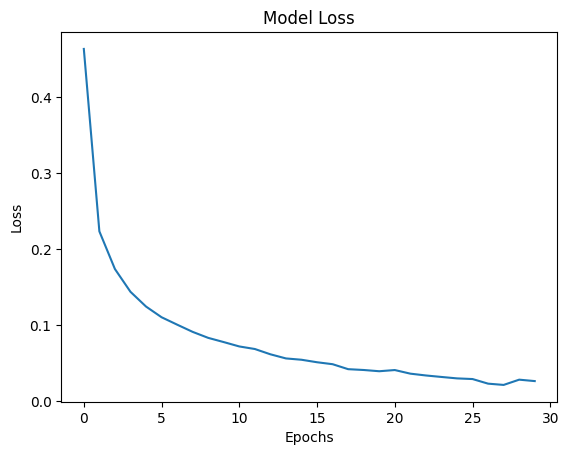

In [8]:
def plot_history(hist):
    plt.plot(hist)
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
plot_history(hist);

In [9]:
train_predictions = np.argmax(NN.predict(train_data), axis = 1)
print("Training accuracy: ", accuracy_score(train["label"].to_numpy(), train_predictions))
test_predictions = np.argmax(NN.predict(test_data), axis = 1)
print("Test accuracy: ", accuracy_score(test["label"].to_numpy(), test_predictions))

Training accuracy:  0.9939455782312925
Test accuracy:  0.9577777777777777


In [10]:
def predict_image(index):
    current_image = test_data[index, :]
    prediction = np.argmax(NN.predict(current_image), axis = 1)
    label = test["label"].to_numpy()[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = "nearest")
    plt.show()

Prediction:  [9]
Label:  9


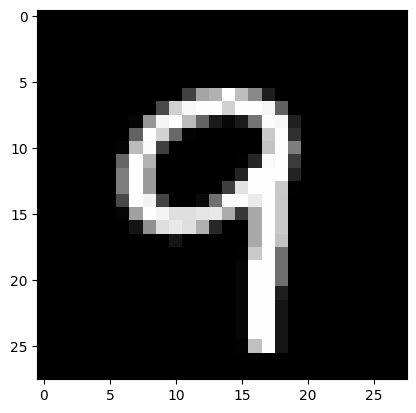

In [11]:
predict_image(1)

Prediction:  [1]
Label:  1


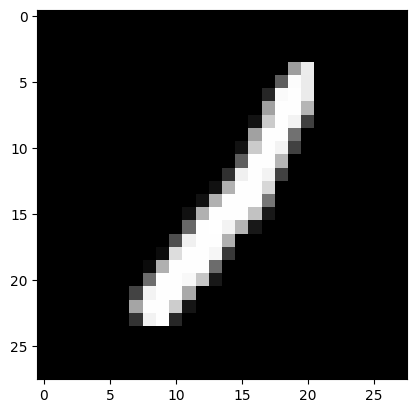

In [12]:
predict_image(2)

Prediction:  [1]
Label:  1


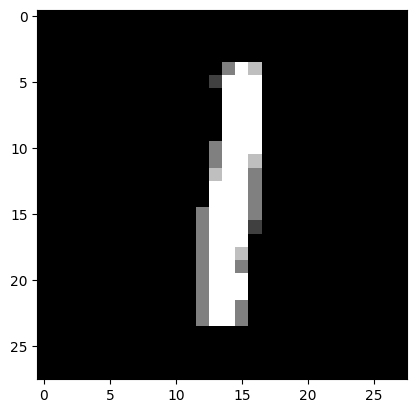

In [13]:
predict_image(3)

### **Binary-Class Classification**

In [14]:
data = pd.read_csv("binaryclass_train.csv", header = None)
data["label"] = data[1].apply(lambda x: 1 if x == "M" else 0)
train, test = train_test_split(data, test_size = 0.3)
train_data = train.loc[:, ~train.columns.isin([0, 1, "label"])].to_numpy()
train_target = train["label"].to_numpy()
test_data = test.loc[:, ~test.columns.isin([0, 1, "label"])].to_numpy()
test_target = test["label"].to_numpy()

In [15]:
train

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,label
421,906564,B,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,...,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208,0
306,89344,B,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,...,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385,0
542,921644,B,14.740,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.030270,...,32.29,107.40,826.4,0.10600,0.13760,0.16110,0.10950,0.2722,0.06956,0
492,914062,M,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.117000,0.077620,...,26.06,143.40,1426.0,0.13090,0.23270,0.25440,0.14890,0.3251,0.07625,1
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,89296,B,11.460,18.16,73.59,403.1,0.08853,0.07694,0.033440,0.015020,...,21.61,82.69,489.8,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,0
170,87139402,B,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,...,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771,0
56,857637,M,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,...,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294,1
439,909410,B,14.020,15.66,89.59,606.5,0.07966,0.05581,0.020870,0.026520,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,0


In [16]:
NN = NeuralNetwork(input_size = train_data.shape[1])
NN.add_layer(16, "relu")
NN.add_layer(16, "relu")
NN.add_layer(1, "sigmoid")
NN.compile(loss = "binary crossentropy")
NN.summary()

---- Model Summary ----
Layer 1: relu
W: (16, 30) b: (16, 1)
Trainable parameters: 496
Layer 2: relu
W: (16, 16) b: (16, 1)
Trainable parameters: 272
Layer 3: sigmoid
W: (1, 16) b: (1, 1)
Trainable parameters: 17


In [17]:
hist = NN.fit(train_data, train_target, epochs = 1000, batch_size = 32, learning_rate = 0.01, verbose = 0)

Training finished after epoch 1000 with a loss of 0.17439436582044646.


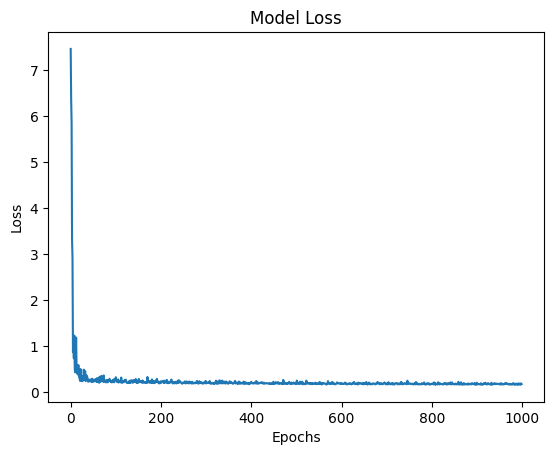

In [18]:
plot_history(hist);

In [19]:
train_predictions = np.round(NN.predict(train_data))
print("Training accuracy: ", accuracy_score(train["label"].to_numpy(), train_predictions))
test_predictions = np.round(NN.predict(test_data))
print("Test accuracy: ", accuracy_score(test["label"].to_numpy(), test_predictions))

Training accuracy:  0.9346733668341709
Test accuracy:  0.9298245614035088
